In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("jumlah-taman-pendidikan-al-quran-guru-dan-murid.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [4]:
print(x)

[[ 113  379]
 [ 564 6766]
 [1197 3908]
 [ 338  960]
 [ 976 3903]
 [ 418 1666]
 [ 721 2300]
 [ 520 5010]
 [ 110 2310]
 [ 121 3400]
 [ 721 9123]
 [ 421 3344]
 [ 230 2320]
 [ 560 7533]
 [ 121 2321]
 [ 144 2344]
 [ 172 2346]
 [ 211 3342]
 [ 231 5412]
 [ 731 9242]
 [ 233 5212]
 [ 732 9342]
 [ 425 6421]
 [ 111 2421]]


In [5]:
print(y)

[ 5554 34142 60225 15958 58308 31585  2732  2321  3234  3822 14231 23214
 21212 15211  3262  2132  2233 32432 35433 46452 43657  8964  4566  3245]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [7]:
print(x_train)

[[ 560 7533]
 [ 111 2421]
 [ 172 2346]
 [ 110 2310]
 [ 721 2300]
 [ 211 3342]
 [ 976 3903]
 [1197 3908]
 [ 418 1666]
 [ 231 5412]
 [ 121 3400]
 [ 520 5010]
 [ 731 9242]
 [ 338  960]
 [ 113  379]
 [ 732 9342]
 [ 144 2344]
 [ 230 2320]]


In [8]:
print(x_test)

[[ 421 3344]
 [ 721 9123]
 [ 425 6421]
 [ 121 2321]
 [ 233 5212]
 [ 564 6766]]


In [9]:
print(y_train)

[15211  3245  2233  3234  2732 32432 58308 60225 31585 35433  3822  2321
 46452 15958  5554  8964  2132 21212]


In [10]:
print(y_test)

[23214 14231  4566  3262 43657 34142]


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train)

[[ 0.42216363  1.47729011]
 [-0.97387828 -0.53786535]
 [-0.78421558 -0.56743043]
 [-0.97698751 -0.58162166]
 [ 0.92274881 -0.58556367]
 [-0.66295581 -0.17480624]
 [ 1.71560112  0.04634052]
 [ 2.40273979  0.04831152]
 [-0.01934629 -0.8354871 ]
 [-0.60077132  0.64118981]
 [-0.94278604 -0.15194258]
 [ 0.29779464  0.48272101]
 [ 0.95384106  2.1509796 ]
 [-0.26808427 -1.113793  ]
 [-0.96765984 -1.34282377]
 [ 0.95695028  2.1903997 ]
 [-0.87127387 -0.56821883]
 [-0.60388054 -0.57767965]]


In [13]:
print(x_test)

[[-0.01001861 -0.17401784]
 [ 0.92274881  2.10406969]
 [ 0.00241829  1.03893861]
 [-0.94278604 -0.57728545]
 [-0.59455287  0.56234961]
 [ 0.43460053  1.17493795]]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

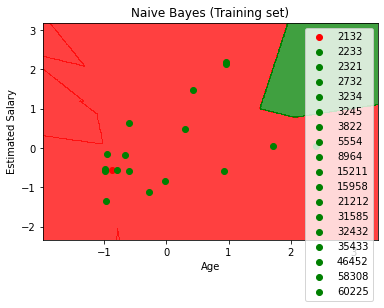

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() +  1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +  1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,  j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label= j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

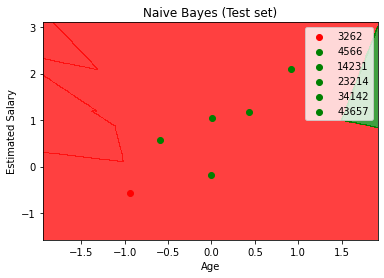

In [18]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() +  1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +  1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,  j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label= j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend()
plt.show()